<a href="https://colab.research.google.com/github/snovamo86861/MachineLearning/blob/master/Reconocimiento_de_imagenes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

Modelo pre-entrenado


In [2]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 104M/104M [00:01<00:00, 82.2MB/s] 


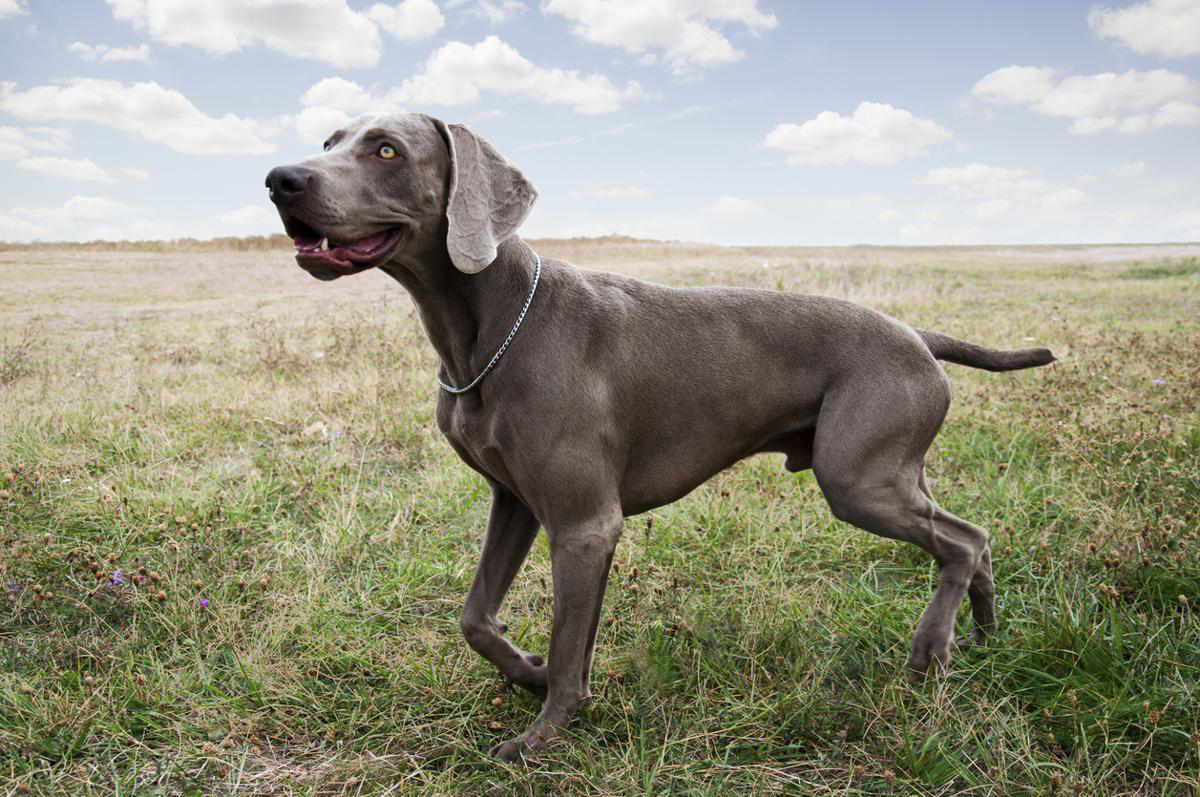

In [3]:
url = 'https://pixfeeds.com/images/25/554199/1200-154226158-weimaraner-dog.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


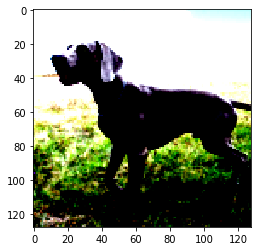

In [5]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [6]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [7]:
out = inception(batch)
out

tensor([[ 2.1383e+00, -1.6541e+00, -8.2599e-01,  5.1553e+00,  5.3110e+00,
          5.1536e+00,  4.3269e+00, -3.6785e+00, -1.7092e+00,  1.0375e+00,
          2.4240e+00, -9.4039e-01,  2.1647e+00,  1.8266e+00, -2.8527e+00,
         -4.4821e+00, -1.3836e+00,  5.4958e-01, -9.1132e+00, -2.5189e+00,
          5.3489e+00, -3.3532e-01, -2.2987e+00, -4.0620e+00,  5.6886e+00,
         -1.9407e+00, -7.5183e+00, -5.1309e+00, -3.7879e-01, -2.6076e+00,
         -2.7776e+00,  7.4120e-01, -3.1322e+00,  1.5702e+00, -2.5137e+00,
         -8.1868e-01,  7.0465e+00, -2.6117e+00,  5.3585e+00, -3.7042e+00,
          2.5161e+00,  4.4386e+00, -2.4612e+00, -4.5205e+00,  3.0608e+00,
         -5.5632e+00, -7.3732e+00, -2.0882e+00, -1.4088e+00, -4.5045e+00,
         -7.7740e+00,  9.6029e+00, -8.5183e+00,  6.1944e-01, -3.5996e+00,
         -2.6845e+00, -4.7721e+00, -4.5942e+00, -2.8542e+00,  3.7566e+00,
         -1.1226e+01,  6.4815e+00,  2.1740e+00,  1.3551e+00, -1.4678e+00,
         -3.7059e+00, -5.1589e+00,  9.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [9]:
out

tensor([[ 2.1383e+00, -1.6541e+00, -8.2599e-01,  5.1553e+00,  5.3110e+00,
          5.1536e+00,  4.3269e+00, -3.6785e+00, -1.7092e+00,  1.0375e+00,
          2.4240e+00, -9.4039e-01,  2.1647e+00,  1.8266e+00, -2.8527e+00,
         -4.4821e+00, -1.3836e+00,  5.4958e-01, -9.1132e+00, -2.5189e+00,
          5.3489e+00, -3.3532e-01, -2.2987e+00, -4.0620e+00,  5.6886e+00,
         -1.9407e+00, -7.5183e+00, -5.1309e+00, -3.7879e-01, -2.6076e+00,
         -2.7776e+00,  7.4120e-01, -3.1322e+00,  1.5702e+00, -2.5137e+00,
         -8.1868e-01,  7.0465e+00, -2.6117e+00,  5.3585e+00, -3.7042e+00,
          2.5161e+00,  4.4386e+00, -2.4612e+00, -4.5205e+00,  3.0608e+00,
         -5.5632e+00, -7.3732e+00, -2.0882e+00, -1.4088e+00, -4.5045e+00,
         -7.7740e+00,  9.6029e+00, -8.5183e+00,  6.1944e-01, -3.5996e+00,
         -2.6845e+00, -4.7721e+00, -4.5942e+00, -2.8542e+00,  3.7566e+00,
         -1.1226e+01,  6.4815e+00,  2.1740e+00,  1.3551e+00, -1.4678e+00,
         -3.7059e+00, -5.1589e+00,  9.

In [0]:
_, index = torch.max(out, 1)

In [11]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Weimaraner', 100.0)

In [12]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

Weimaraner 100.0
Chesapeake Bay retriever 2.7103876406945335e-16
German short-haired pointer 1.155372527691771e-16
Doberman, Doberman pinscher 1.7601055130729967e-18
vizsla, Hungarian pointer 1.7335316121116948e-18
